# PSTAT 100 Project Report 
---

# YouTube Top Trending Video Analysis 
  
#### Author and contributions
<u>Harleen Kaur</u> contributed to tidying, PCA analysis, correlation matrix analysis, MLR, Abstract, Methods, Discussion  
<u>Amelia Meyer</u> contributed to tidying, exploratory(scatterplots, barplots, wordcloud), Background, Abstract, Data Description, Discussion


In [3]:
from IPython.display import Image
Image(filename='images/youtube.jpeg', width = 700, height = 300)

FileNotFoundError: [Errno 2] No such file or directory: 'youtube.jpeg'

In [7]:
# <center><img src='https://cdn.searchenginejournal.com/wp-content/uploads/2020/12/2ff5499e-0bf8-4ffc-b205-e496aca01204-5fe397b4e68ca-1520x800.jpeg' style= 'width:100:px, height:100:px'></center>

## Report Outline
[Introduction](#intro)   
[Data Description](#data_description)   
[Methods](#methods)  
[Results](#results)  
[Discussion](#discussion)  
[Initial exporations](#init_explore)  
[Planned work](#planned_work)  

---
<a name="intro"/>

# Introduction

## Background: Trending Videos on Youtube (US) 

According to Cloudfare, YouTube was the 8th most visited site, and the 3rd most visited social media site in 2021 ([See this cbs article for more rankings](https://www.cbsnews.com/news/tiktok-google-facebook-social-media-internet/)). With millions of users in the US and around the world, YouTube has developed its own gravitational force, pulling people in to watch content varying from makeup tutorials to [scuba-divers solving cold cases](https://www.washingtonpost.com/nation/2021/12/10/youtube-scuba-diver-cold-case/). 

The most popular content on YouTube is referred to as 'trending' - a term that gained popularity due to Twitter's hashtags. Luckily for us, YouTube tracks their [top trending videos](https://www.youtube.com/feed/trending) which, according to Variety magazine, are measured by user interactions "number of views, shares, comments and likes". 

## Abstract

The purpose of our project will be to analyze the top trending videos on YouTube in the US. Our dataset only contains videos in the US that appeared on the Top Trending list in the last three years (2021 through 2022) so our analysis will not extend to YouTube videos in general. Our goals are to get a better understanding of the types of videos that appear on the Top Trending list in the US. In particular, we will be focusing on identifying patterns amongst the top trending videos. We will explore whether certain genres receive more views and likes, or dislikes;  whether there are any consistent top-trenders (are there particular music artists that appear on the top trending list often?); and whether a high number of dislikes prompts top-trenders to disable their views from commenting. Through our graphical and statistical analysis of the dataset we show that music is the most popular category on average in terms of views and likes. We also show a strong a positive relationship between likes, dislikes, views, and comment_counts. 

---
<a name="data_description"/>

## Dataset Description

The dataset we will be using for our analysis is the [YouTube Trending Video Dataset](https://www.kaggle.com/rsrishav/youtube-trending-video-dataset) which documents the daily record of the top trending videos on YouTube (updated daily). Our dataset was collected by Rishav Sharma and made available through Kaggle with for the purpose of data analysis. The data was collected using the [YouTube API](https://developers.google.com/youtube/v3) as provided by Google which uses web-scraping. We'll be focusing specifically on the dataset for top trending YouTube videos in the US which includes up to 200 of the top trending videos per day, spanning from August 12th, 2020 to February 28th, 2022.  

Our dataset consists of 16 columns and 113391 rows. Each row is an observation representing one video that appeared on the top trending YouTube videos list in the US. Each column represents one of the following variable: title, date_published channel_name, category, trending_date, tags, view_count, likes, dislikes, comment_count, comments_disabled, ratings_disabled,year_published, month_published, year_trending, month_trending. There are no missing values in our dataset. 
 
As we observed our dataset, we found some cool things. The most viewed and liked video is "Butter" by BTS ( a iconic KPOP songs). In fact, we see KPOP music in the top charts quite often. Curious as to which genres are most popular, we found that music, entertainment, and gaming tend to have a highest amount of view counts and likes. 

##### Below is are tabled representations of the variables in our dataset that we used for analysis and interpretation.

Our cateogry variable can be represented as one of the following 16 categories:

Name | Variable description | Type | Units of measurement
---|---|---|---
title | video title | object or string | ...
date_published | date video was published | object or string | ...
channel_name | name of channel video was published on | object or string | ...
category | category video falls under; genre of video | object or string | ...
trending_date | date video was trending | object or string | ...
tags | tags attached to video; video identifiers added by video creator | object or string | ...
view_count | number of views video received | int64 or integers | ...
likes | number of likes video received | int64 or integers | ...
dislikes | number of dislikes video received | int64 or integers | ...
comment_count | number of comments on video | int64 or integers | ...
comments_disabled | whether the comments were disabled | bool or true/false | ...
ratings_disabled | whether the ratings were disabled | bool or true/false | ...
year_published | what year the vide was published | int64 or integers | 4-digit year values
month_published | what month the year was published | int64 or integers | 1 or 2-digit month value
year_trending | what year the video was trending | int64 or integers | 4-digit year value
month_trending | what month the video was trending | int64 or integers | 1 or 2-digit month value

#### Here are the first 3 rows and 5 columns of our dataset after performing initial cleaning:

In [56]:
import pandas as pd

# load new csv
trending = pd.read_csv(r'C:\Users\candy\Documents\PSTAT100FinalProject\trending.csv')

# print a few example rows of dataset in tidy format
trending.drop(columns=['Unnamed: 0'], inplace=True)

trending.iloc[:3, :5]

,title,date_published,channel_name,category,trending_date
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11,Brawadis,People & Blogs,2020-08-12
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11,Apex Legends,Gaming,2020-08-12
2,I left youtube for a month and THIS is what ha...,2020-08-11,jacksepticeye,Entertainment,2020-08-12


### Methods 

Our approach to understand the trends in trending US YouTube videos begins with visualizations of different type of video interactions. We also constructed different summary tables to explore which genres of videos tend to have more views or which types of videos have comments or ratings disabled. Furthermore, we analyzed the correlation between the variables in the dataset to interpret the relationship between different types of video interactions,. We hypothesized that there may be a positive relationship between the amount of dislikes a video gets to whether its video interactions, such as comments, are disabled. We also analyzed the covariation in the trending dataset through Principal Component Analysis (PCA) in order to visualize correlation and preserve linear transformations in the data. In addition, to measure the association between view counts, likes, dislikes, and comment counts we conducted Multiple Linear Regression. Through these methodologies, we were able to observe some interesting trends in the data.

---
## Results

### Category Popularity Exploration

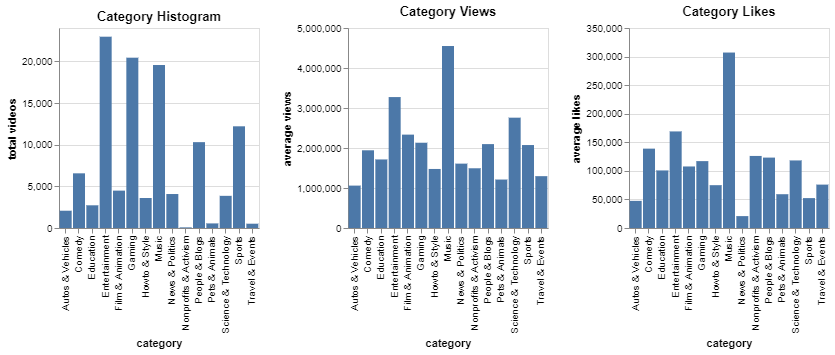

In [33]:
Image(filename='category_hists.png')

The figures above are histograms of different observation count, views, and likes against category respectively. Plot one (left) shows the number of videos allocated to each category. Plot two (middle) shows the average view counts for all videos within each category. Plot three (right) shows the average number of likes for each category. As we can see, music has the highest views and likes on average. This is in agreement with our analysis of the videos with the most likes (the first 10 of which belong to the music category), and the most views (the first 4 of which belong to the music category). We can conclude that music videos are the most popular of the top trending videos in the US during our dataset's timeframe on average, followed by Entertainment. 

### Word Cloud

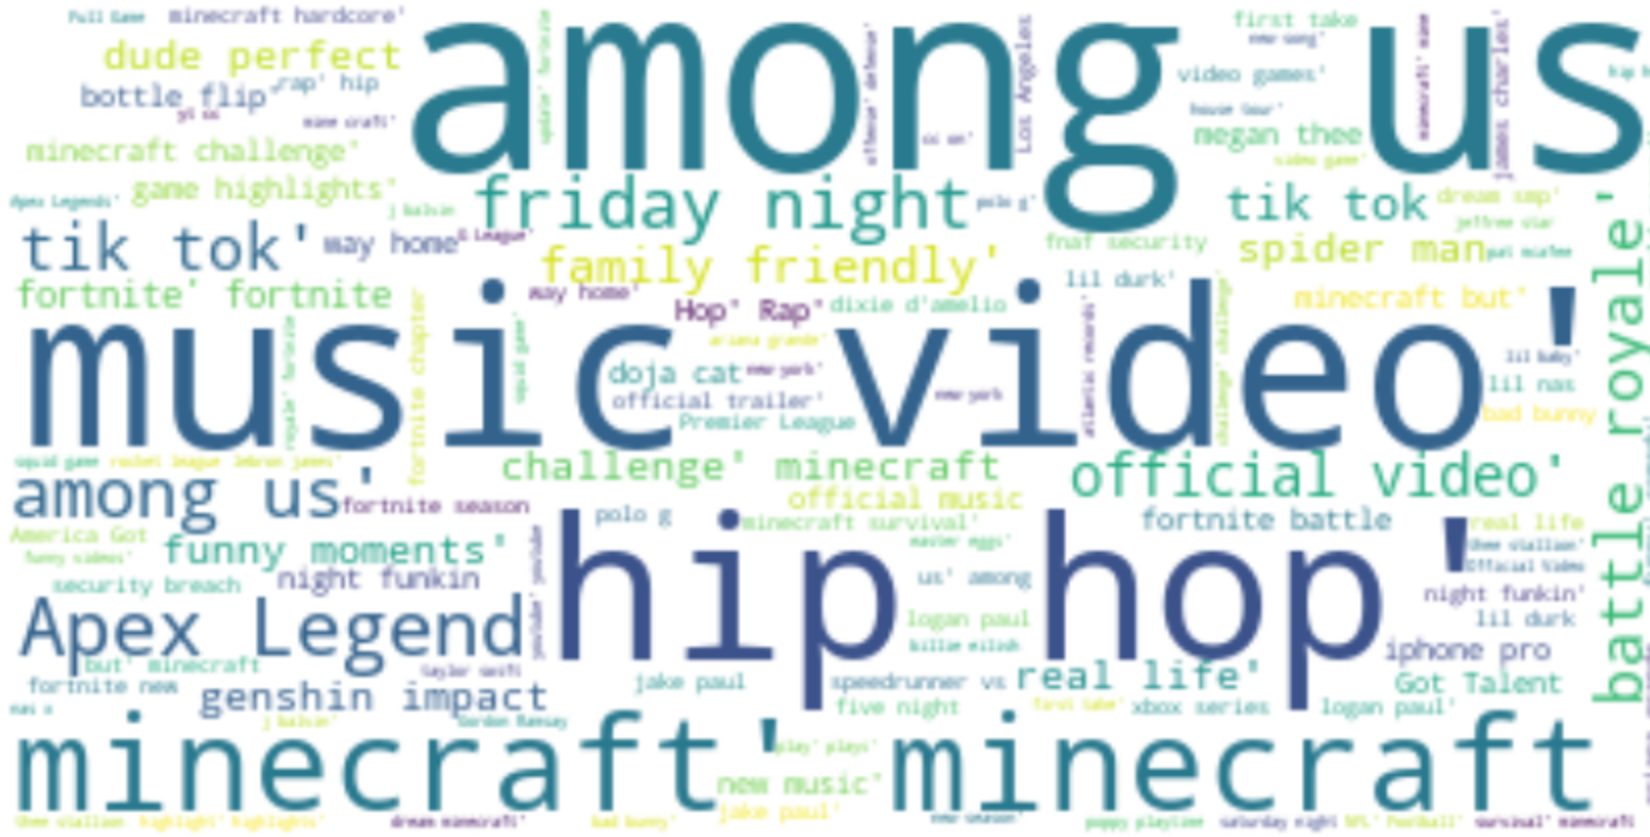

In [5]:
Image(filename='images/wordcloud_tags.png', width = 500, height = 400)

YouTube videos allow creators to add tags that identify the types of content features in their videos. Therefore, we created a word cloud (above) to showcase the most popular tags in our dataset. Popularity of the tags is determines solely by the usage number within our dataset, and is displayed by the font size within the word cloud i.e. words with bigger fonts are more popular. We can see that 'among us', 'music video', and 'hip hop' are the three most popular tags. This reflects our analysis of the category histograms. 

### Correlation Matrix

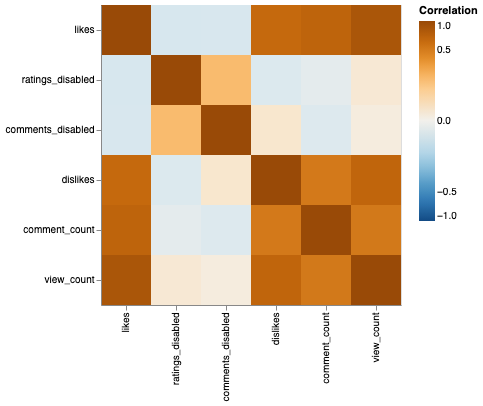

In [48]:
Image(filename='images/corrmatrix.png', width = 400, height = 300)

The correlation matrix tells us that there is a positive relationship between `likes`, `dislikes`, `views`, and `comment_counts`. This means that if one type of video interaction increases, so do others. For example, trending videos with more likes tend to also have a higher amount dislikes despite being the opposite sentiment. Furthermore, `likes` are slightly negatively correlated with `ratings_disabled` and `comments_disabled`. Therefore, the more positive interactions (likes) a video has, the less likely that the videos comments or ratings will be disabled by the channel. Another notable relationship is the positive correlation with `view_count` with `ratings_disabled` and `comments_disabled`. 

## Principal Component Analysis

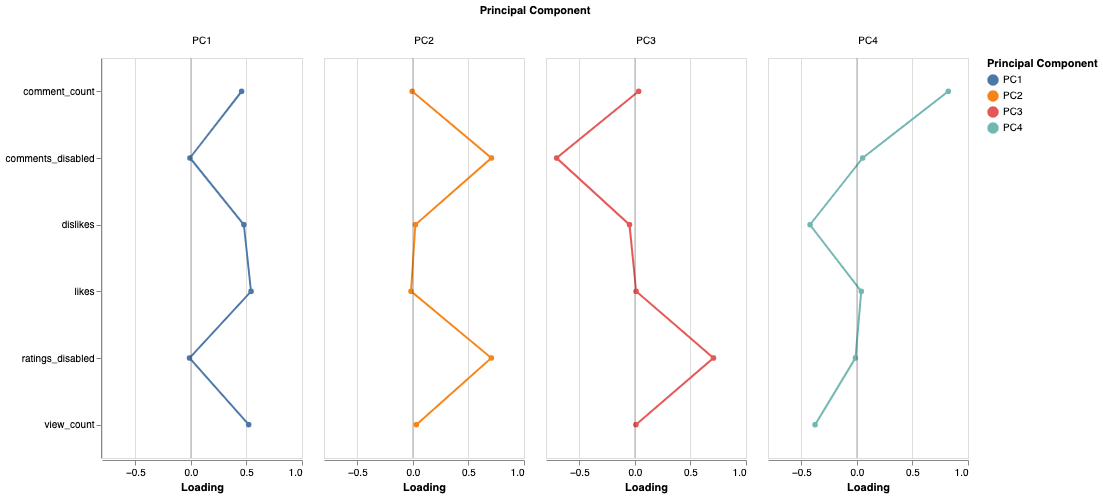

In [53]:
Image(filename='images/loading_plot.png', width = 800, height = 300)

Interpretation of the PC's

**PC1**:  `comment_count`, `view_count`, `dislikes` and `likes`  have the largest positive loading values. Therefore, increasing these values increase the level of PC1. This is consistent with the correlation matrix we constructed earlier. We can conclude that PC1 represents counts of video interactions.   
**PC2**: High values are coming from videos with comments or ratings disabled. This may describe the positive relationship between videos with interactions disabled.   
**PC3**: Negative Disabled interaction. High values of `comments_disabled` lower the values of this PC while high values of `ratings_disabled` raises it. In the correlation matrix we observed that these two variables are positively correlated.   
**PC4**: `comment_count` has a high positive loading. `Dislikes` and `view_count` have a low value. This PC may also represent a different relationship between video interactions.  

### Multiple Linear Regression

$$\underbrace{\text{view count}_i}_{y_i} 
    = \beta_0 + \beta_1 \underbrace{\text{likes}_i}_{x_{i1}} + \beta_2 \underbrace{\text{dislikes}_i}_{x_{i2}} + \beta_3 \underbrace{\text{comment count}_i}_{x_{i3}} + \epsilon_i$$

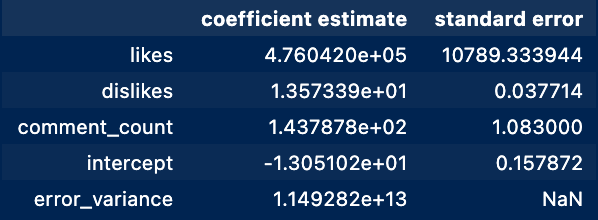

In [54]:
Image(filename='images/mlrtable.png', width = 400, height = 300)

To measure the association between view counts, likes, dislikes, and comment counts we conducted MLR. 

Among the US trending videos, a 1% increase in likes is associated with an 4.76 increase in number of views. A 1% increase in dislikes coincides with a 1.35% increase in view counts. Lastly, a 1% increase in comments is associated with a 1.43% increase in number of views. The computed $R^2$ for this model was 0.76. Therefore, there is still a significant amount of unexplained variation in the interactions of trending videos.

---
## Discussion

The results we obtained in our analysis are only applicable to videos that are trending in the United States from August 2020-March 2022. Therefore, our results are not generalizable to all Youtube videos or even trending videos necessarily. Nonetheless, we did obtain some valuable information on various types of video interactions. Through our bar plots, and wordcloud, we found that music, followed closely by entertainment and gaming are the most common categories in the top trending list.This reflects our initial finding that BTS' music video for their song "Butter" was the most popular video in our dataset. According to PCA, MLR, and the correlation matrix there is a positive relationship between `likes`, `dislikes`, `comment_counts`, and `view_counts` in US trending YouTube videos. Therefore, different type of video interactions are correlated and tend to move together in these trending videos. This might be intuitive interpreted as: videos with more views tend to have a higher number of likes, dislikes, and comments as more attention on a video by YouTube users leads to more opinions about the video (hence likes, dislikes, and comments). Since these interactions all require a user to "view" a video, the video interaction variables may be proxies for each other and exemplify confounding. However, there is still unexplained variation in the view counts of trending videos that is unrelated to other types of video interactions.

We initially aimed to test if the number of dislikes on a video influenced whether or not comments were turned off. We figured since the number of dislikes and comments were positively correlated, more dislikes might equate to a larger quantity of negative comments, therfore prompting creators to turn off their comments. Since we chose to take our analysis in a different direction and focus our attention on popularity as well as relationships amongst the variables, we leave this as further possible analysis. Another topic for further analysis is how or why a video trends. To explore this we can compare videos that are trending to videos that are more likely to be recommended to viewers. That way, we can address viewer biases and other types of variations in the data.